# 1. Importing necessary packages

In [46]:

import warnings
warnings.filterwarnings("ignore")


import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score, mean_squared_error
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor


# 2. Import the data from the csv file

In [2]:
data = pd.read_csv("LoanStats.csv")

# 3. Data Exploration

- Initial Data Exploration

- Explore Missing Values

- Explore Duplicated rows

- Explore target variable(Interest Rate)

- Explore numeric features

- Explore categorical fearures

- Explore correlation between variables

## 3.1 Initial Data Exploration

In [3]:
data

,int_rate,loan_amnt,term,grade,home_ownership,annual_inc,purpose
0,10.65,5000,36,B,RENT,24000.0,credit_card
1,15.27,2500,60,C,RENT,30000.0,car
2,15.96,2400,36,C,RENT,12252.0,small_business
3,13.49,10000,36,C,RENT,49200.0,other
4,12.69,3000,60,B,RENT,80000.0,other
...,...,...,...,...,...,...,...
39781,8.07,2500,36,A,MORTGAGE,110000.0,home_improvement
39782,10.28,8500,36,C,RENT,18000.0,credit_card
39783,8.07,5000,36,A,MORTGAGE,100000.0,debt_consolidation
39784,7.43,5000,36,A,MORTGAGE,200000.0,other


In [4]:
#Checking the first 5 rows of the data
data.head()

,int_rate,loan_amnt,term,grade,home_ownership,annual_inc,purpose
0,10.65,5000,36,B,RENT,24000.0,credit_card
1,15.27,2500,60,C,RENT,30000.0,car
2,15.96,2400,36,C,RENT,12252.0,small_business
3,13.49,10000,36,C,RENT,49200.0,other
4,12.69,3000,60,B,RENT,80000.0,other


In [5]:
#Descriptive statistics
data.describe()

,int_rate,loan_amnt,term,annual_inc
count,39786.000000,39786.000000,39786.000000,3.978600e+04
mean,12.027873,11231.360277,42.448499,6.897907e+04
std,3.727466,7464.542832,10.638782,6.376263e+04
min,5.420000,500.000000,36.000000,4.000000e+03
25%,9.250000,5500.000000,36.000000,4.050000e+04
50%,11.860000,10000.000000,36.000000,5.900000e+04
75%,14.590000,15000.000000,60.000000,8.234250e+04
max,24.590000,35000.000000,60.000000,6.000000e+06


In [6]:
#check the datatypes of the variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39786 entries, 0 to 39785
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   int_rate        39786 non-null  float64
 1   loan_amnt       39786 non-null  int64  
 2   term            39786 non-null  int64  
 3   grade           39786 non-null  object 
 4   home_ownership  39786 non-null  object 
 5   annual_inc      39786 non-null  float64
 6   purpose         39786 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 2.1+ MB


## 3.2 Exploring Missing Values

In [7]:
#Check if there is any missing values in the dataset
data.isna().sum()

int_rate          0
loan_amnt         0
term              0
grade             0
home_ownership    0
annual_inc        0
purpose           0
dtype: int64

There are no missing values in this dataset

## 3.3 Exploring duplicates

In [8]:
data.duplicated().value_counts()

False    39540
True       246
dtype: int64

There are 246 duplicated rows in the dataset. In data preperation step we will drop duplicated values.

## 3.4 Exploring the target variable

In [9]:
# Check all values of interest rate and their counts.
data.int_rate.value_counts()

10.99    958
13.49    831
11.49    826
7.51     787
7.88     725
        ... 
18.36      1
16.96      1
16.15      1
16.01      1
17.44      1
Name: int_rate, Length: 371, dtype: int64

In [10]:
#Top 20 most frequent interest rates
data.int_rate.value_counts().head(20)

10.99    958
13.49    831
11.49    826
7.51     787
7.88     725
7.49     656
11.71    609
9.99     603
7.90     582
5.42     573
11.99    535
12.69    492
10.37    470
12.99    449
6.03     447
8.49     445
12.42    443
10.65    435
5.79     410
8.90     402
Name: int_rate, dtype: int64

In [11]:
#Top 20 least frequent interest rates
data.int_rate.value_counts().tail(20)

15.38    2
14.62    2
22.94    2
22.64    1
24.59    1
24.40    1
21.48    1
14.67    1
17.54    1
16.71    1
20.52    1
17.46    1
17.34    1
16.20    1
18.72    1
18.36    1
16.96    1
16.15    1
16.01    1
17.44    1
Name: int_rate, dtype: int64

We will get a clearer idea of the distribution of the target variable by visualizing the data. 

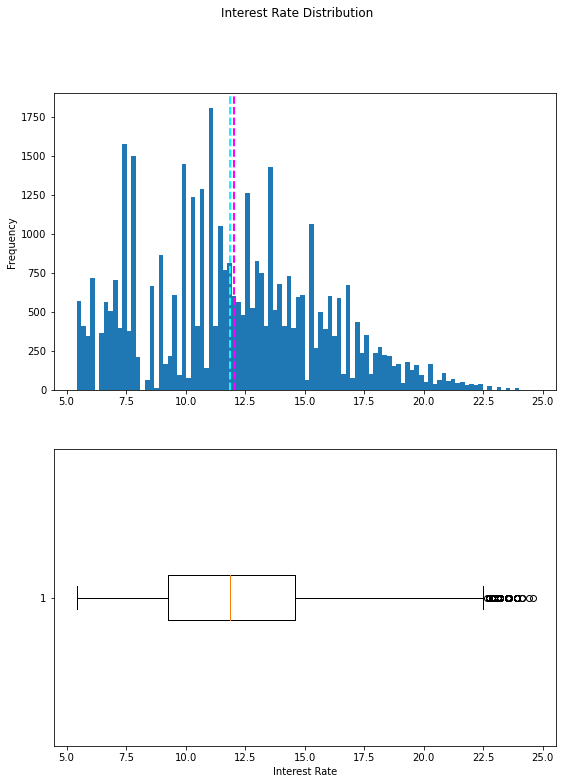

In [12]:
# Get the label column
label = data['int_rate']


# Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(2, 1, figsize = (9,12))

# Plot the histogram   
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')

# Add lines for the mean, median, and mode
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

# Plot the boxplot   
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Interest Rate')

# Add a title to the Figure
fig.suptitle('Interest Rate Distribution')

# Show the figure
fig.show()

The plots show that the number of daily rentals ranges from 5% to 25%. The distribution is nearly normal and right skewed. From the boxplot we can see that there are outliers which are higher than 22.5%


## 3.5 Exploring other variables

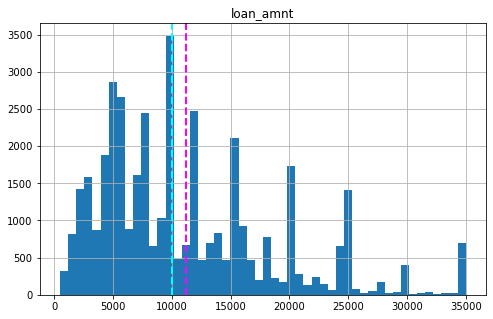

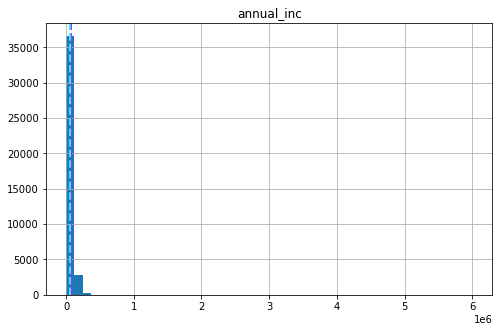

In [13]:
# Plot a histogram for each numeric feature
numeric_features = ['loan_amnt', 'annual_inc']
for col in numeric_features:
    fig = plt.figure(figsize=(8, 5))
    ax = fig.gca()
    feature = data[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

Other numerical features are not normally distributed.

Let's check the categorical variables

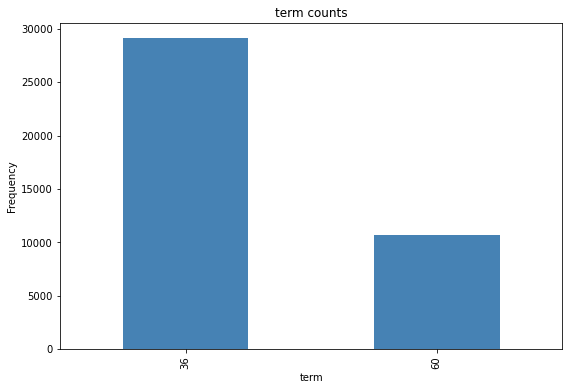

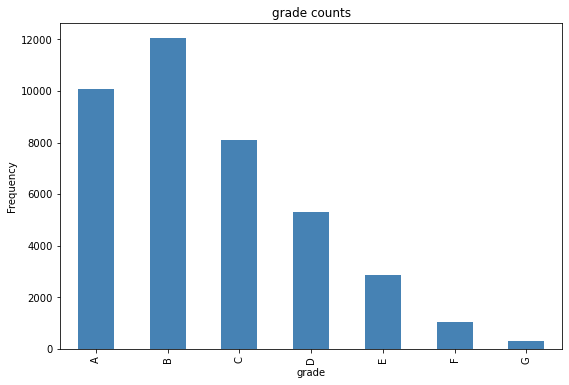

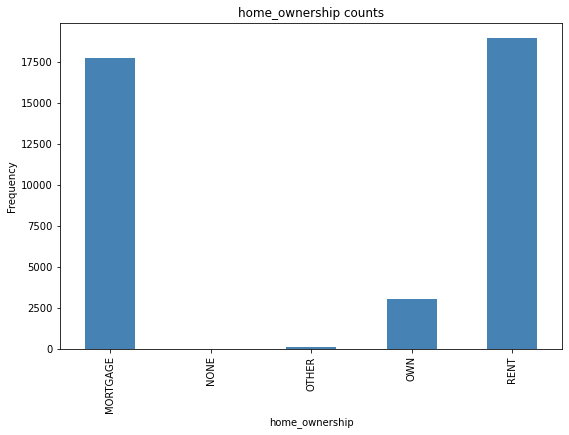

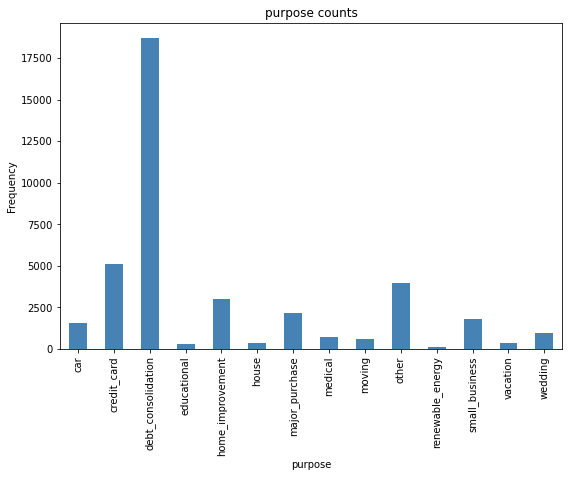

In [14]:
#Checking categorical variables
# plot a bar plot for each categorical feature count
categorical_features = ['term','grade','home_ownership','purpose']

for col in categorical_features:
    counts = data[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

When we check the distribution of the categorical variables we observed that;

- The common term is '36'.

- The most common grade is 'B'.

- 'Mortgage and rent' are the most frequents.

- The most common purpose for loan is 'debt'.

## 3.6 Correlation between variables

Text(0.5, 1.0, 'Heatmap for the Data')

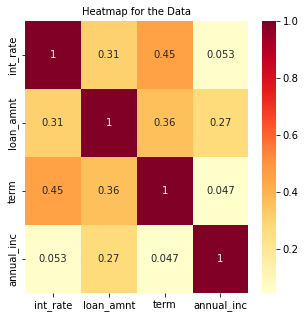

In [15]:
# exploring correlation
# Heatmap for correlation
plt.rcParams['figure.figsize'] = (5,5)
sns.heatmap(data.corr(),cmap="YlOrRd", annot=True)
plt.title('Heatmap for the Data', fontsize = 10)

The highest correlation with the target variable(int_rate) is the 'term' variable.

# 4. Data Preparation

- Removing Duplicated rows
- Converting ordered variables to numeric variables
- Transforming categorical variables
- Splitting the dataset into training and test sets

## 4.1 Remove Duplicated rows

In the data exploration step, we found out that there are 246 duplicated rows.
Let's remove these rows.

In [16]:
data.drop_duplicates(inplace=True)

In [17]:
# check to see if there is anymore duplicates in the data
data.duplicated().sum()

0

## 4.2 Transformation of categorical variables

Convert all categorical variables to numerical variables. Since the 'grade' is ordinal variable we will sort it.

In [18]:
#Sort the data by grades
data = data.sort_values(by=['grade'], ascending=True)

In [19]:
from sklearn import preprocessing
categorical_features = ['grade','home_ownership','purpose']
le = preprocessing.LabelEncoder()
for feature in categorical_features:
    data[feature] = le.fit_transform(data[feature])

In [20]:
data.head()

,int_rate,loan_amnt,term,grade,home_ownership,annual_inc,purpose
19897,7.29,8000,36,0,4,552000.0,1
26219,7.88,8000,36,0,0,30000.0,1
26218,7.14,5000,36,0,0,110000.0,2
26217,7.51,10000,36,0,4,30000.0,4
26216,7.88,8000,36,0,0,72000.0,2


Text(0.5, 1.0, 'Heatmap for the Data')

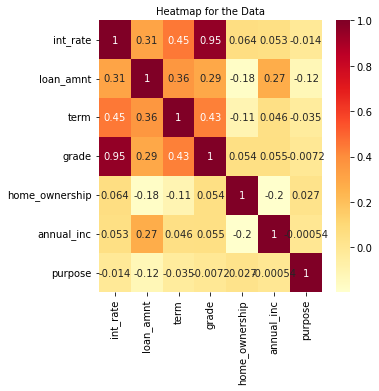

In [21]:
# exploring correlation
# Heatmap for correlation
plt.rcParams['figure.figsize'] = (5,5)
sns.heatmap(data.corr(),cmap="YlOrRd", annot=True)
plt.title('Heatmap for the Data', fontsize = 10)

After transforming categorical variable into numerical variables we check the correlation once again. 
We can observe that The highest correlation with the target variable(int_rate) is the 'grade' variable now.

The columns 'home_ownership' and 'purpose' are categorical variables but thay are not ordinal variables,

So, we will use one hot encoding to transform them

In [22]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
cat_features = ['home_ownership','purpose']
encoded_features=[]
for feature in cat_features:
    encoded_feat = enc.fit_transform(data[feature].values.reshape(-1,1)).toarray()
    n = data[feature].nunique()
    cols = ['{}_{}'.format(feature,n) for n in range (1,n+1)]
    enc_df = pd.DataFrame(encoded_feat,columns=cols)
    enc_df.index = data.index
    encoded_features.append(enc_df)
    
data = pd.concat([data, *encoded_features],axis = 1)

## 4.3 Splitting dataset into training and test set

In [23]:
X = data.drop(columns=['int_rate', 'home_ownership', 'purpose']) #the entire dataframe without target column,'home_ownership' and 'purpose' 
y = data['int_rate'] # our target variable

We dropped 'home_ownership' and 'purpose' columns since we one-hot encoded them already.

In [24]:
# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
#the random state at 42 so we can obtain the same results
print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 27678 rows
Test Set: 11862 rows


# 5. Modelling

The target variable is interest rate. We'll train the following models:

- Multiple Linear Regression
- Lasso Regression
- Ridge Regression
- Random Forest Regression
- Decision Tree Regression
- Gradient Boosting Regression

We will evaluate the models using the followings

- Coefficient of Determination (known as R-squared or R2)
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)

### 5.1 Linear Regression

 Train R2: 0.9040413334229414
 Test R2: 0.9035553595731611
MSE: 1.3577504275701533
RMSE: 1.1652254835739533


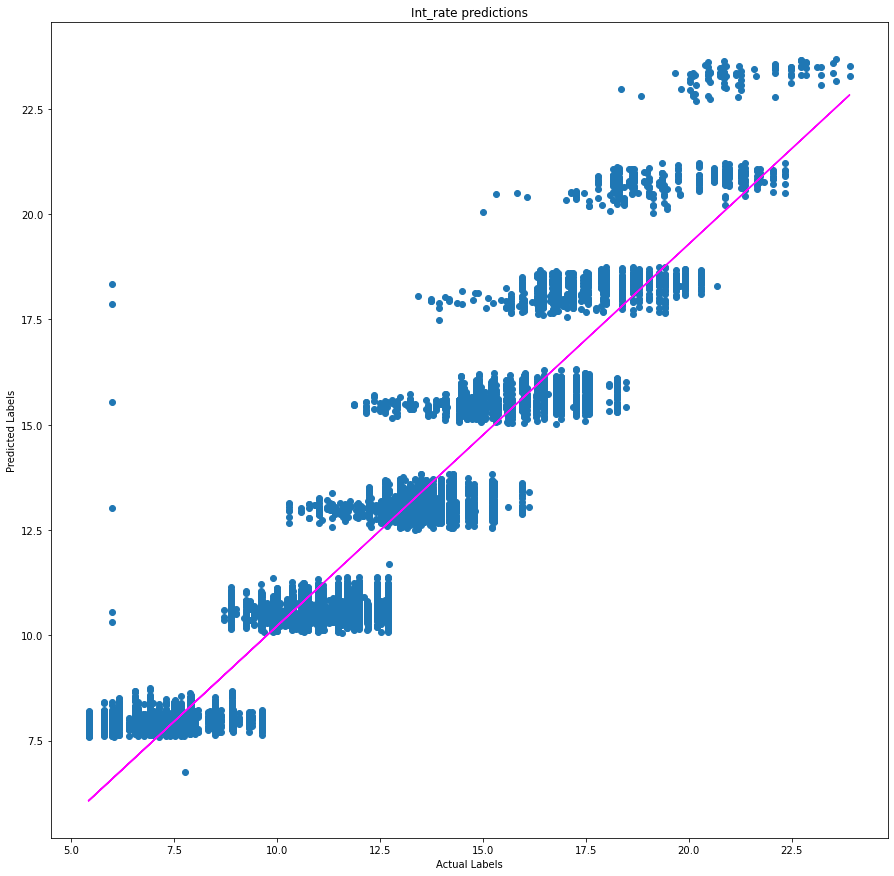

In [25]:
# Fiting the model on training data
model_lr = LinearRegression().fit(X_train, y_train)

#Prediction of test set
predict_lr= model_lr.predict(X_test) 
    
#Model Evaluation
X_pred = model_lr.predict(X_train)
trainr2 = r2_score(y_train, X_pred)
print(" Train R2:", trainr2)
r2 = r2_score(y_test, predict_lr)
print(" Test R2:", r2)
mse = mean_squared_error(y_test, predict_lr)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
    
    
# Plot predicted values vs actual values
plt.figure(figsize=(15,15))
plt.scatter(y_test, predict_lr)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Int_rate predictions')
# overlay the regression line
z = np.polyfit(y_test, predict_lr, 1) 
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()
    

linear_regression = ('Linear Regression', r2, trainr2, rmse, mse)

The model seems to perform well and not overfit when we compare the train and test R2 scores , the scores are very close to each other. However Let's try another Linear Regression model without 'home_ownership' and 'purpose' variables to check if this approach increase the performance, because these variables are not highly corellated with our target variable 'int_rate'

### 5.1.2 Linear Regression Second Trial

In [41]:
data1 = data[["loan_amnt","grade","term","annual_inc"]]
X1 = data1
y1 = data['int_rate']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.3, random_state = 42)

 Train R2: 0.9030195681566573
 Test R2: 0.9024083259104169
MSE: 1.3738984005330446
RMSE: 1.1721341222458481


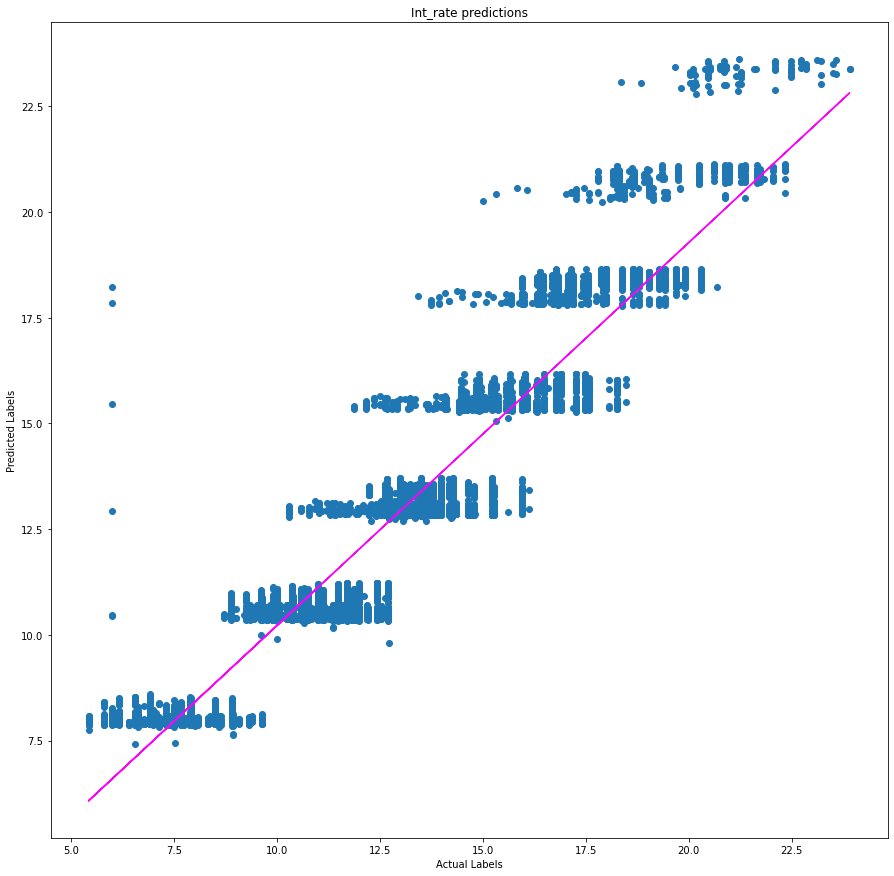

In [42]:
# Fiting the model on training data
model_lr1 = LinearRegression().fit(X_train1, y_train1)

#Prediction of test set
predict_lr1= model_lr1.predict(X_test1) 
    
#Model Evaluation
X_pred1 = model_lr1.predict(X_train1)
trainr2 = r2_score(y_train1, X_pred1)
print(" Train R2:", trainr2)
r2 = r2_score(y_test1, predict_lr1)
print(" Test R2:", r2)
mse = mean_squared_error(y_test1, predict_lr1)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
    
    
# Plot predicted values vs actual values
plt.figure(figsize=(15,15))
plt.scatter(y_test1, predict_lr1)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Int_rate predictions')
# overlay the regression line
z = np.polyfit(y_test1, predict_lr1, 1) 
p = np.poly1d(z)
plt.plot(y_test1,p(y_test1), color='magenta')
plt.show()
    

linear_regression_2 = ('Linear Regression_2', r2, trainr2, rmse, mse)

We dropped the 'home_ownership' and 'purpose' columns, however it did not change our result significantly. 
Even, our initial Linear Regression trial was better compared to the second trial.

### 5.2 LASSO Regression

 Train R2: 0.8593373052303169
 Test R2: 0.8595480464907918
MSE: 1.9772866494831436
RMSE: 1.4061602502855581


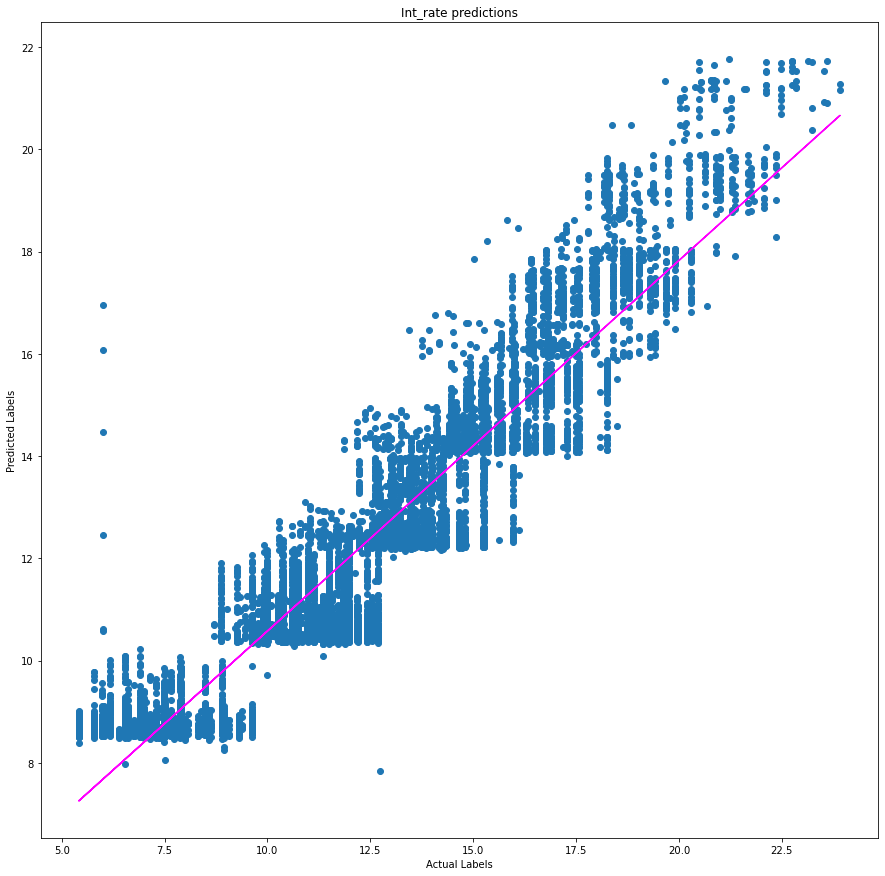

In [26]:
from sklearn.linear_model import Lasso

# Fiting the model on training data
model_lasso = Lasso().fit(X_train, y_train)

#Prediction of test set
predict_lasso= model_lasso.predict(X_test) 
    
#Model Evaluation

#Model Evaluation
X_pred_lasso = model_lasso.predict(X_train)
trainr2 = r2_score(y_train, X_pred_lasso)
print(" Train R2:", trainr2)
r2 = r2_score(y_test, predict_lasso)
print(" Test R2:", r2)
mse = mean_squared_error(y_test, predict_lasso)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

        
# Plot predicted values vs actual values
plt.figure(figsize=(15,15))
plt.scatter(y_test, predict_lasso)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Int_rate predictions')
# overlay the regression line
z = np.polyfit(y_test, predict_lasso, 1) 
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()
    
lasso_regression = ('Lasso Regression', r2, trainr2, rmse, mse)

There is no overfitting because Train R2 and Test R2 are quite similar in the Lasso regression model. Results are close to what we have with the Linear Regression 

### 5.2.1 LASSO - GRID SEARCH AND CROSS VALIDATION

Performing GridSearchCV with Cross Validation technique on Lasso Regression and finding the optimum value of alpha and find the best result for r2.

In [27]:
params = {'alpha': (np.logspace(-8, 8, 100))} # It will check from 1e-08 to 1e+08
lasso = Lasso(normalize=True)
lasso_model = GridSearchCV(lasso, params, cv = 10, n_jobs=-1, scoring='r2') #Create 10-fold Cross Validation sets.
lasso_model.fit(X_train, y_train)
print(lasso_model.best_params_)
print(lasso_model.best_score_)
print(lasso_model.best_estimator_)

lasso = lasso_model.best_estimator_
lasso.fit(X_train, y_train)
pred_lasso = lasso.predict(X_test)

X_pred_lasso_grid = lasso_model.predict(X_train)
trainr2 = r2_score(y_train, X_pred_lasso_grid)
print(" Train R2:", trainr2)
r2 = r2_score(y_test, pred_lasso)
print(" Test R2:", r2)
err = np.sqrt(mean_squared_error(y_test, pred_lasso))
print('Root Mean Squared Error: ', err)
mse = mean_squared_error(y_test, pred_lasso)
print("MSE:", mse)

lasso_regression_best = ('Lasso Regression best', r2, trainr2, err, mse)


{'alpha': 2.656087782946684e-06}
0.9039074609840536
Lasso(alpha=2.656087782946684e-06, normalize=True)
 Train R2: 0.9040410801264654
 Test R2: 0.9035583601912147
Root Mean Squared Error:  1.1652073569896106
MSE: 1.3577081847827137


### 5.3 Ridge Regression

 Train R2: 0.904040539031082
 Test R2: 0.903559322423877
MSE: 1.3576946384435604
RMSE: 1.1652015441302679


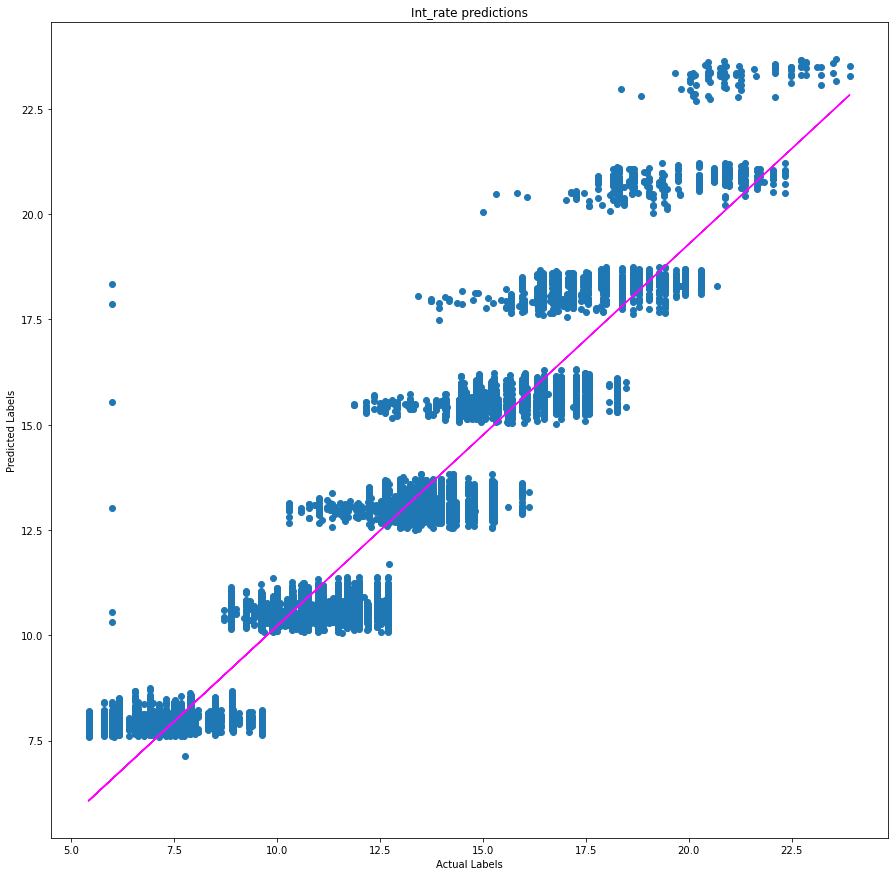

In [28]:
from sklearn.linear_model import Ridge

# Fiting the model on training data
model_Ridge = Ridge().fit(X_train, y_train)

#Prediction of test set
predict_Ridge= model_Ridge.predict(X_test) 
    
#Model Evaluation

X_pred_Ridge = model_Ridge.predict(X_train)
trainr2 = r2_score(y_train, X_pred_Ridge)
print(" Train R2:", trainr2)
r2 = r2_score(y_test, predict_Ridge)
print(" Test R2:", r2)
mse = mean_squared_error(y_test, predict_Ridge)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
        
    
# Plot predicted values vs actual values
plt.figure(figsize=(15,15))
plt.scatter(y_test, predict_Ridge)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Int_rate predictions')
# overlay the regression line
z = np.polyfit(y_test, predict_Ridge, 1) 
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()
    

Ridge_regression =('Ridge_regression', r2, trainr2, rmse, mse)

There is no overfitting because Train R2 and Test R2 are quite similar in Ridge Regression model.

### 5.3.1 RIDGE - GRID SEARCH AND CROSS VALIDATION

In [29]:
# Performing GridSearchCV with Cross Validation technique on Ridge Regression and finding the optimum value of alpha and find the best result for r2

params_ridge = {'alpha': (np.logspace(-8, 8, 100))} # It will check from 1e-08 to 1e+08
ridge = Ridge(normalize=True)
ridge_model = GridSearchCV(ridge, params_ridge, cv = 10, n_jobs=-1, scoring='r2') #Create 10-fold Cross Validation sets.
ridge_model.fit(X_train, y_train)
print(ridge_model.best_params_)
print(ridge_model.best_score_)
print(ridge_model.best_estimator_)

ridge = ridge_model.best_estimator_
ridge.fit(X_train, y_train)
pred_ridge = ridge.predict(X_test)

X_pred_ridge_grid = ridge_model.predict(X_train)
trainr2 = r2_score(y_train, X_pred_ridge_grid)
print(" Train R2:", trainr2)
r2 = r2_score(y_test, pred_ridge)
print(" Test R2:", r2)
err = np.sqrt(mean_squared_error(y_test, pred_ridge))
print('Root Mean Squared Error: ', err)
mse = mean_squared_error(y_test, pred_ridge)
print("MSE:", mse)

Ridge_regression_best = ('Ridge Regression best', r2, trainr2, err, mse)


{'alpha': 7.56463327554629e-05}
0.9039071687565554
Ridge(alpha=7.56463327554629e-05, normalize=True)
 Train R2: 0.9040413275131324
 Test R2: 0.9035557714438576
Root Mean Squared Error:  1.1652229955002684
MSE: 1.3577446292426187


The best result for R2 score by finding best parameter ('alpha': 5.214008287999695e-05) is as above. It did not change compared to initial attempt with Ridge Regression.

## 5.4 Decision Tree Regression

 Train R2: 0.9958508621257098
 Test R2: 0.8596690484159919
MSE: 1.9755831808927666
RMSE: 1.4055544033913332
R2: 0.8596690484159919


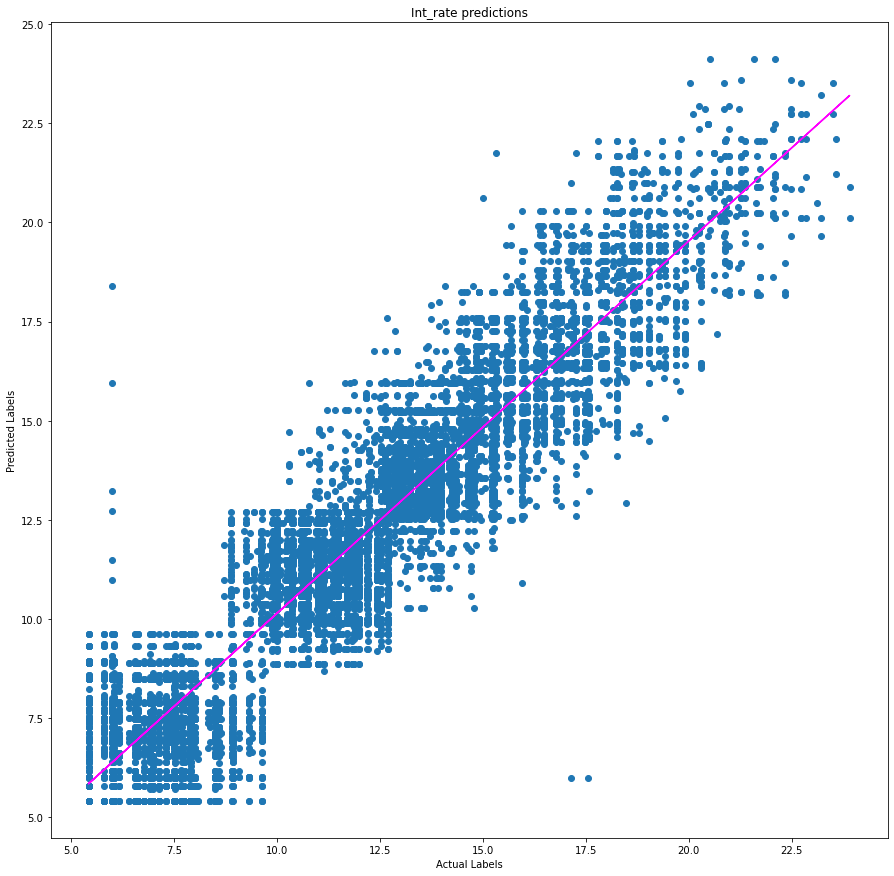

In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text


# Fiting the model on training data
model_DT = DecisionTreeRegressor().fit(X_train, y_train)

#Prediction of test set
predict_DT= model_DT.predict(X_test) 
    
#Model Evaluation
 
X_pred_dt = model_DT.predict(X_train)
trainr2 = r2_score(y_train, X_pred_dt)
print(" Train R2:", trainr2)
r2 = r2_score(y_test, predict_DT)
print(" Test R2:", r2)    
mse = mean_squared_error(y_test, predict_DT)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predict_DT)
print("R2:", r2)

    
# Plot predicted values vs actual values
plt.figure(figsize=(15,15))
plt.scatter(y_test, predict_DT)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Int_rate predictions')
# overlay the regression line
z = np.polyfit(y_test, predict_DT, 1) 
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()
    

DecisionTree_regression =('DecisionTree_regression', r2, trainr2, rmse, mse)


There can be easily seen that The R2 scores of Training and Test sets are really far from each other(approx 14%) and the score of the Train set is really high. Overfitting might have started.

### 5.4.1 Decision Tree Regression - GRID SEARCH with CROSS VALIDATION

In order to prevent the Overfitting, we can use the Cross Validation method with Grid Search.

In [31]:
# Performing GridSearchCV with Cross Validation technique on Decision Tree Regression and finding the optimum value of alpha and find the best result for r2

params_DT = {'max_depth': [2,4,5,7,10,25,50,100,None], #[10] #np.linspace(1, 10, 10) The maximum depth of the tree
          'max_features': ['auto', 'sqrt', 'log2'], #The number of features to consider when looking for the best split
          'min_samples_leaf': [3,4,5,6,7,8], #[3,4,5,6,7,8] The minimum number of samples required to be at a leaf node
          #'min_samples_split': [np.linspace(0.1, 1.0, 10)], #np.linspace(0.1, 1.0, 10) The minimum number of samples required to split an internal node
          #'criterion': ['mse'] #The function to measure the quality of a split
         }
Decision_tree = DecisionTreeRegressor()
Decision_tree_model = GridSearchCV(Decision_tree, params_DT, cv = 10, n_jobs=-1, scoring='r2')
Decision_tree_model.fit(X_train, y_train)
print(Decision_tree_model.best_params_)
print(Decision_tree_model.best_score_)
print(Decision_tree_model.best_estimator_)

Decision_tree = Decision_tree_model.best_estimator_
Decision_tree.fit(X_train, y_train)
pred_Decision_tree = Decision_tree.predict(X_test)

X_pred_dt_grid = Decision_tree_model.predict(X_train)
trainr2 = r2_score(y_train, X_pred_dt_grid)
print(" Train R2:", trainr2)
r2 = r2_score(y_test, pred_Decision_tree)
print(" Test R2:", r2)    
err = np.sqrt(mean_squared_error(y_test, pred_Decision_tree))
print('Root Mean Squared Error: ', err)
mse = mean_squared_error(y_test, pred_Decision_tree)
print("MSE:", mse)

Decision_tree_regression_best = ('Decision_tree Regression best', r2, trainr2, err, mse)

{'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 8}
0.9269442780883053
DecisionTreeRegressor(max_depth=7, max_features='auto', min_samples_leaf=8)
 Train R2: 0.9294026607459362
 Test R2: 0.9270087384124679
Root Mean Squared Error:  1.0136927958302246
MSE: 1.0275730843180977


The overfitting problem is solved with the Cross Validation and Train R2 and Test R2 results are balanced now.
The Score is better when we compare it with the previous regression models.

## 5.5 Random Forest Regressor

 Train R2: 0.9852546296907909
 Test R2: 0.9152619771676587
MSE: 1.192944327677162
RMSE: 1.0922199081124468


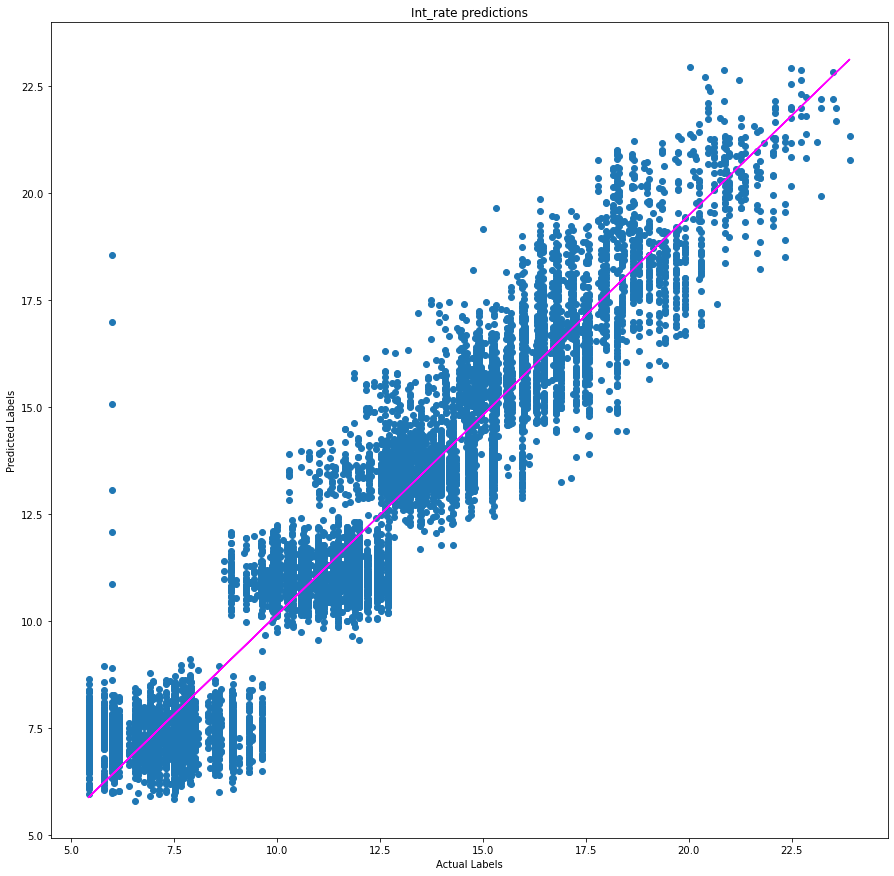

In [32]:
from sklearn.ensemble import RandomForestRegressor


# Fiting the model on training data
model_RF = RandomForestRegressor().fit(X_train, y_train)

#Prediction of test set
predict_RF= model_RF.predict(X_test) 
    
#Model Evaluation

X_pred_rf = model_RF.predict(X_train)
trainr2 = r2_score(y_train, X_pred_rf)
print(" Train R2:", trainr2)
r2 = r2_score(y_test, predict_RF)
print(" Test R2:", r2)    
mse = mean_squared_error(y_test, predict_RF)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

    
# Plot predicted values vs actual values
plt.figure(figsize=(15,15))
plt.scatter(y_test, predict_RF)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Int_rate predictions')
# overlay the regression line
z = np.polyfit(y_test, predict_RF, 1) 
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()
    

RandomForest_regression =('RandomForest_regression', r2, trainr2, rmse, mse)


### 5.5.1 Random Forest - GRID SEARCH with CROSS VALIDATION

In [33]:
# Performing GridSearchCV with Cross Validation technique on Random Forest Regression and finding the optimum value of alpha and find the best result for r2

params_RF = {'max_depth': [2,4,5,7,10,25,50,100,None], # The maximum depth of the tree
          'max_features': ['auto', 'sqrt', 'log2'], #The number of features to consider when looking for the best split
          'min_samples_leaf': [3,4,5,6,7,8], #[3,4,5,6,7,8] The minimum number of samples required to be at a leaf nodet
         }

RF= RandomForestRegressor()
RF_model = GridSearchCV(RF, params_RF, cv = 10, n_jobs=-1, scoring='r2')
RF_model.fit(X_train, y_train)
print(RF_model.best_params_)
print(RF_model.best_score_)
print(RF_model.best_estimator_)

RF = RF_model.best_estimator_
RF.fit(X_train, y_train)
pred_RF = RF.predict(X_test)

X_pred_rf_grid = RF_model.predict(X_train)
trainr2 = r2_score(y_train, X_pred_rf_grid)
print(" Train R2:", trainr2)
r2 = r2_score(y_test, pred_RF)
print(" Test R2:", r2)
err = np.sqrt(mean_squared_error(y_test, pred_RF))
print('Root Mean Squared Error: ', err)
mse = mean_squared_error(y_test, pred_RF)
print("MSE:", mse)

RandomForest_regression_best = ('RandomForest Regression best', r2, trainr2, err, mse)

{'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 7}
0.9278939191953857
RandomForestRegressor(max_depth=7, max_features='auto', min_samples_leaf=7)
 Train R2: 0.9302519752351986
 Test R2: 0.9281398225536637
Root Mean Squared Error:  1.0058079583992405
MSE: 1.0116496491792484


The overfitting problem is solved with the Cross Validation and Train R2 and Test R2 results are more balanced now.
The Score is better when we compare it with the previous models.

## 5.5 Gradient Boosting

 Train R2: 0.9288164174023946
 Test R2: 0.9278560709480368
MSE: 1.0156443124612984
RMSE: 1.007791800155815


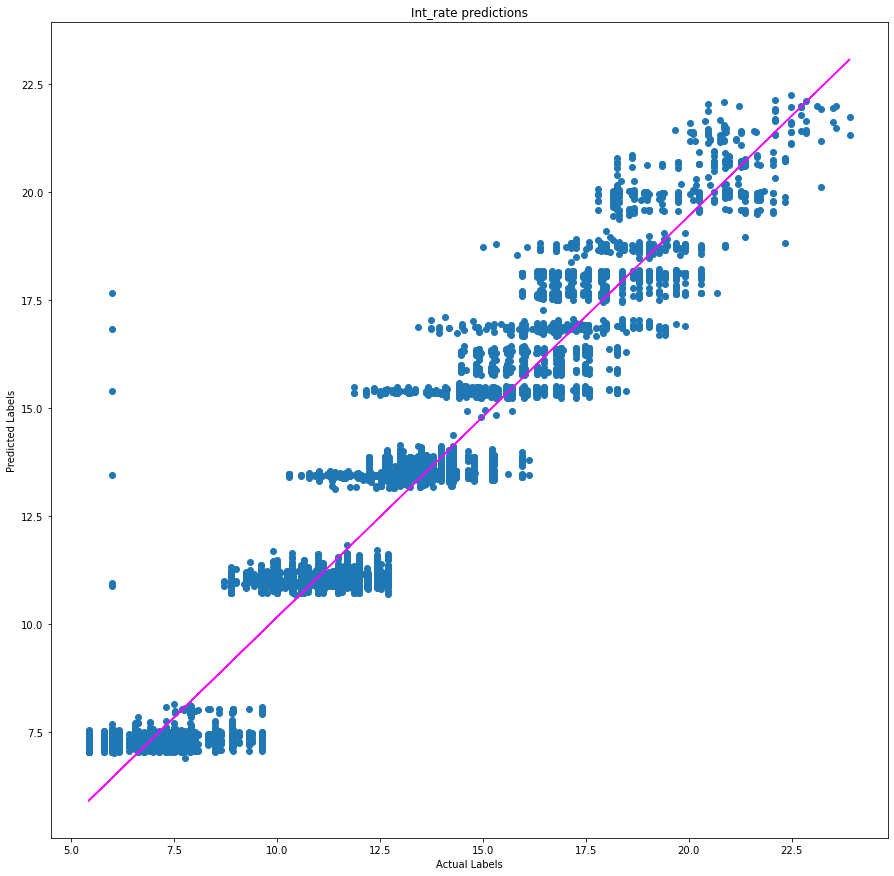

In [34]:

# Fiting the model on training data
model_GB = GradientBoostingRegressor().fit(X_train, y_train)

#Prediction of test set
predict_GB= model_GB.predict(X_test) 
    
#Model Evaluation

X_pred_GB = model_GB.predict(X_train)
trainr2 = r2_score(y_train, X_pred_GB)
print(" Train R2:", trainr2)
r2 = r2_score(y_test, predict_GB)
print(" Test R2:", r2)    
mse = mean_squared_error(y_test, predict_GB)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
    
    
# Plot predicted values vs actual values
plt.figure(figsize=(15,15))
plt.scatter(y_test, predict_GB)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Int_rate predictions')
# overlay the regression line
z = np.polyfit(y_test, predict_GB, 1) 
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()
    

GradientBoosting =('GradientBoosting', r2, trainr2, rmse, mse)


Thre sult with Gradient Boosting is pretty good already. and balanced Test and Train R2 result is observed. Let's try to improve the model with GridSearchCV

### 5.5.1 Gradient Boosting - GRID SEARCH with CROSS VALIDATION

In [35]:
# Performing GridSearchCV with Cross Validation technique on Gradient Boosting Regression and finding the optimum value of alpha and find the best result for r2

params_GB = { 'learning_rate': [0.1, 0.5, 1.0],
              'n_estimators' : [50, 100, 150]
         }

GB = GradientBoostingRegressor()
GB_model = GridSearchCV(GB, params_GB, cv = 10, n_jobs=-1, scoring='r2')
GB_model.fit(X_train, y_train)
print(GB_model.best_params_)
print(GB_model.best_score_)
print(GB_model.best_estimator_)

GB = GB_model.best_estimator_
GB.fit(X_train, y_train)
pred_GB = GB.predict(X_test)

X_pred_gb_grid = GB_model.predict(X_train)
trainr2 = r2_score(y_train, X_pred_gb_grid)
print(" Train R2:", trainr2)
r2 = r2_score(y_test, pred_GB)
print(" Test R2:", r2)
err = np.sqrt(mean_squared_error(y_test, pred_GB))
print('Root Mean Squared Error: ', err)
mse = mean_squared_error(y_test, pred_GB)
print("MSE:", mse)

Gradient_Boosting_best = ('GradientBoosting Regression best', r2, trainr2, err , mse)

{'learning_rate': 0.1, 'n_estimators': 150}
0.9279807003437727
GradientBoostingRegressor(n_estimators=150)
 Train R2: 0.929421555638137
 Test R2: 0.9278749699987354
Root Mean Squared Error:  1.0076597893539623
MSE: 1.0153782510808715


The result did not increase significantly

In [43]:
df_results = pd.DataFrame([Decision_tree_regression_best, RandomForest_regression_best, linear_regression, lasso_regression, lasso_regression_best, Ridge_regression, Ridge_regression_best, Gradient_Boosting_best, GradientBoosting, linear_regression_2], columns = ['model', 'Test R2','Train R2','RMSE', 'MSE'])
df_results.sort_values('Test R2',ascending=False)

,model,Test R2,Train R2,RMSE,MSE
1,RandomForest Regression best,0.928140,0.930252,1.005808,1.011650
7,GradientBoosting Regression best,0.927875,0.929422,1.007660,1.015378
8,GradientBoosting,0.927856,0.928816,1.007792,1.015644
0,Decision_tree Regression best,0.927009,0.929403,1.013693,1.027573
5,Ridge_regression,0.903559,0.904041,1.165202,1.357695
4,Lasso Regression best,0.903558,0.904041,1.165207,1.357708
6,Ridge Regression best,0.903556,0.904041,1.165223,1.357745
2,Linear Regression,0.903555,0.904041,1.165225,1.357750
9,Linear Regression_2,0.902408,0.903020,1.172134,1.373898
3,Lasso Regression,0.859548,0.859337,1.406160,1.977287


The best Results out of all trials is Gradient Boosting with the parameters 
learning_rate=0.1
n_estimators=150


Plotting the Interest rate prediction graph for the best Gradient Boosting result so far.

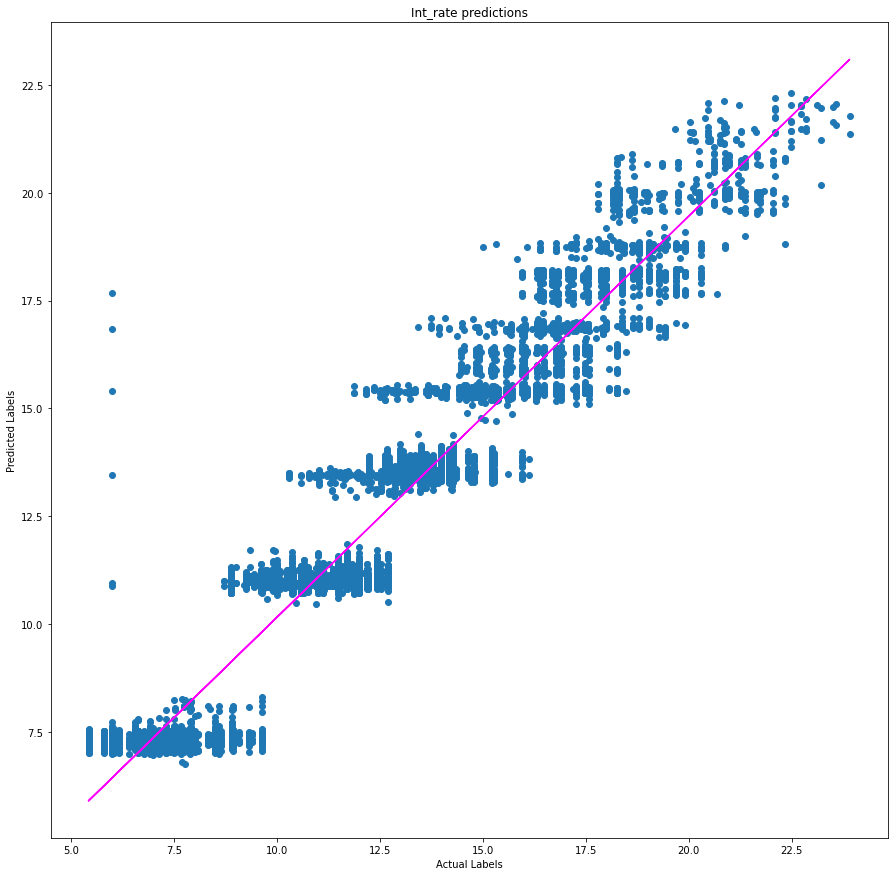

In [44]:
# Plot predicted values vs actual values
plt.figure(figsize=(15,15))
plt.scatter(y_test, pred_GB)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Int_rate predictions')
# overlay the regression line
z = np.polyfit(y_test, pred_GB, 1) 
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()
    